# Untitled Notebook

What's this notebook about?

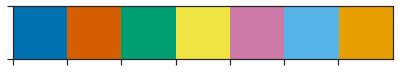

In [1]:
import sys
import os
from glob import glob
import random
import itertools as it

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from adjustText import adjust_text

## Default plotting params

%matplotlib inline
sns.set(font='Arial')
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['figure.dpi'] = 70
style = sns.axes_style('white')
style.update(sns.axes_style('ticks'))
style['xtick.major.size'] = 2
style['ytick.major.size'] = 2
sns.set(font_scale=1.3, style=style)
pal = sns.color_palette(['#0072b2', '#d55e00', '#009e73', '#f0e442', '#cc79a7', '#56b4e9', '#e69f00'])
cmap = ListedColormap(pal.as_hex())
sns.set_palette(pal)
sns.palplot(pal)
plt.show()

In [2]:
fpa_ip = pd.read_csv(
    '../proteomics_pipeline/pipeline/FPA/proteus_output/FPA_vs_col0.tsv',
    sep='\t'
)
fpa_ip['gene_id'] = fpa_ip.protein.str.split('.', expand=True)[0]
fpa_ip = fpa_ip.sort_values('median_logFC', ascending=False)
fpa_ip.head()

,protein,pval,fdr,lower_ci_logFC,median_logFC,upper_ci_logFC,lower_ci_av_exprs,median_av_exprs,upper_ci_av_exprs,col0,FPA,gene_id
265,AT2G43410.2,0.000223,0.082883,9.602227,10.980012,11.836611,21.538075,21.966374,22.655267,1,3,AT2G43410
325,AT3G12130.1,0.000174,0.082883,6.263804,7.308159,9.938657,15.934393,17.249641,17.771819,0,3,AT3G12130
343,AT3G15010.1,0.002273,0.100440,5.162846,6.342568,8.120211,17.430693,18.319515,18.909376,1,3,AT3G15010
640,AT5G40490.1,0.004347,0.100440,5.283210,6.308190,7.576906,17.471655,18.106013,18.618503,1,3,AT5G40490
235,AT2G33410.1,0.002163,0.100440,3.947398,6.152830,7.843524,15.832266,16.677613,17.780329,0,3,AT2G33410


In [3]:
fpa_ip.query('gene_id == "AT4G16280"')

,protein,pval,fdr,lower_ci_logFC,median_logFC,upper_ci_logFC,lower_ci_av_exprs,median_av_exprs,upper_ci_av_exprs,col0,FPA,gene_id
481,AT4G16280.2,0.07301,0.280692,0.874772,2.830061,4.144287,15.071616,15.962817,16.783574,0,2,AT4G16280


In [4]:
bach_pages_et_al_rna_binding = pd.read_excel(
    'data/bach_pages_et_al_rna_binding_proteome.xlsx',
    sheet_name=0,
    skiprows=2
)
bach_pages_et_al_rna_binding = list(it.chain(
    *bach_pages_et_al_rna_binding.Locus.dropna().str.split(';').tolist()
))

In [6]:
reichel_et_al_rna_binding = pd.read_excel(
    'data/reichel_et_al_rna_binding_proteome.xlsx',
    skiprows=1
)
reichel_et_al_rna_binding = reichel_et_al_rna_binding['Gene IDs'].str.upper().tolist()

In [7]:
print(len(fpa_ip.query('median_logFC > 2 & FPA == 3')))

203


In [8]:
print(sum(fpa_ip.query('median_logFC > 2 & FPA == 3').gene_id.isin(
    set(reichel_et_al_rna_binding).union(bach_pages_et_al_rna_binding))
         ))

113


In [41]:
cpa_factors = {
    'AT2G43410': 'FPA',
    'AT5G51660': 'CPSF160',
    'AT5G23880': 'CPSF100',
    'AT1G61010': 'CPSF73-I',
    'AT5G13480': 'FY',
    'AT1G71800': 'CSTF64',
    'AT1G17760': 'CSTF77',
    'AT1G27595': 'TANG1',
    'AT5G01400': 'ESP4',
    'AT4G25550': 'CFIS2',
    'AT5G55670': 'CPSF6',
    'AT1G13190': 'CPSF7',
    'AT3G04680': 'CLP1',
    'AT2G36480': 'PCFS2',
    'AT4G04885': 'PCFS4',
}
splicing_factors = {
    'AT1G14650': 'SF3A1',
    'AT5G64270': 'SF3B1',
    'AT3G55220': 'SF3B3',
    'AT2G18510': 'SF3B4',
    'AT2G30000': 'PHF5A',
    'AT4G36690': 'U2AF65A',
    'AT5G42820': 'U2AF35B',
    'AT1G27650': 'U2AF35A',
}

ctd_factors = {
    'AT4G35800': 'NRPB1',
    'AT4G21710': 'NRPB2',
    'AT5G64960': 'CDKC2',
    'AT4G21670': 'CPL1',
    'AT1G75660': 'XRN3',
}

autonomous_factors = {
    'AT2G43410': 'FPA',
    'AT4G16280': 'FCA',
    'AT5G40490': 'HLP1',
    'AT3G12130': 'KHZ1',
    'AT5G06770': 'KHZ2',
    'AT2G21660': 'GRP7',
    'AT4G39260': 'GRP8',
    'AT2G19520': 'FVE',
    'AT5G58470': 'TAF15b',
    'AT3G04610': 'FLK',
    'AT2G03150': 'EMB1579',
    'AT5G27650': 'PDP1'
}

apa_control_factors = {
    'AT1G76940': 'NSRA',
    'AT4G26000': 'PEP',
    'AT3G12680': 'HUA1',
    'AT5G64390': 'HEN4',
}

m6a_factors = {
    'AT3G05680': 'VIR',
    'AT4G10760': 'MTA',
    'AT3G54170': 'FIP37',
    'AT4G09980': 'MTB',
}

In [29]:
def get_colors(res, label_genes):
    c = []
    for gene_id in res.gene_id:
        for i, g in enumerate(label_genes):
            if gene_id in g:
                c.append(i)
                break
        else:
            c.append(len(label_genes))
    return np.array(c)


def volcano_plot(res, label_genes, labels, ax=None, color_offset=0):
    bins = np.linspace(res.median_av_exprs.min(), res.median_av_exprs.max(), 11)
    size = np.digitize(res.median_av_exprs, bins) * 20
    c = get_colors(res, label_genes)
    order = np.argsort(c)[::-1]
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))
    scatter = ax.scatter(
        x=res.median_logFC.values[order],
        y=-np.log10(res.pval).values[order],
        c=c[order],
        s=size[order],
        cmap=ListedColormap(list(pal.as_hex())[color_offset:len(label_genes) + color_offset] + ['#bbbbbb']),
        edgecolor='white',
    )
    for c, label in zip(pal[color_offset:], labels):
        ax.scatter([], [], color=c, label=label)
    ax.legend(loc=2)
    text = []
    for _, p_val, fdr, _,  logFC, *_, gene_id in res.itertuples(index=False):
        for g in label_genes:
            if gene_id in g:
                t = ax.text(
                    x=logFC, y=-np.log10(p_val),
                    s=g[gene_id],
                    fontsize=10
                )
                text.append(t)
                break
    adjust_text(text,
                x=res.median_logFC.values,
                y=-np.log10(res.pval).values,
                arrowprops=dict(arrowstyle='-', color='k'),
                force_text=(0.2, 0.5),
                force_points=(0.1, 0.25))
    ax.set_xlabel('Median Log2 Fold Change')
    ax.set_ylabel('-Log10 P Value')
    return ax

In [30]:
fpa_ip.query('median_logFC > 2 & FPA == 3')

,protein,pval,fdr,lower_ci_logFC,median_logFC,upper_ci_logFC,lower_ci_av_exprs,median_av_exprs,upper_ci_av_exprs,col0,FPA,gene_id
265,AT2G43410.2,0.000223,0.082883,9.602227,10.980012,11.836611,21.538075,21.966374,22.655267,1,3,AT2G43410
325,AT3G12130.1,0.000174,0.082883,6.263804,7.308159,9.938657,15.934393,17.249641,17.771819,0,3,AT3G12130
343,AT3G15010.1,0.002273,0.100440,5.162846,6.342568,8.120211,17.430693,18.319515,18.909376,1,3,AT3G15010
640,AT5G40490.1,0.004347,0.100440,5.283210,6.308190,7.576906,17.471655,18.106013,18.618503,1,3,AT5G40490
235,AT2G33410.1,0.002163,0.100440,3.947398,6.152830,7.843524,15.832266,16.677613,17.780329,0,3,AT2G33410
...,...,...,...,...,...,...,...,...,...,...,...,...
19,AT1G09270.1,0.077764,0.288504,1.250752,2.055924,3.549873,14.864712,15.611687,16.014273,0,3,AT1G09270
108,AT1G54270.1,0.112939,0.332975,2.024182,2.024182,2.024182,21.094004,21.094004,21.094004,3,3,AT1G54270
180,AT2G05380.3,0.103301,0.324784,2.020560,2.020560,2.020560,23.969189,23.969189,23.969189,3,3,AT2G05380
24,AT1G10580.1,0.074417,0.283167,1.091406,2.012986,3.618744,15.810996,16.613875,17.074665,1,3,AT1G10580


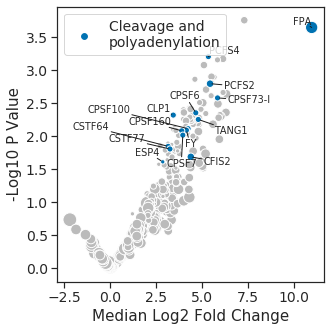

In [50]:
fig, ax = plt.subplots(figsize=(5, 5))
volcano_plot(
    fpa_ip.query('FPA == 3'),
    [cpa_factors],
    ['Cleavage and\npolyadenylation'],
    ax
)
plt.tight_layout()
plt.savefig('figures/proteomics_cpa_factors.svg')
plt.show()

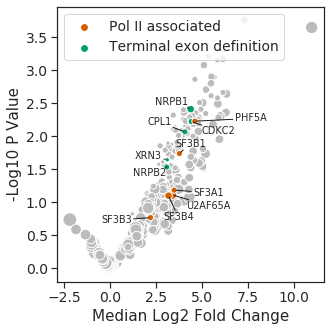

In [51]:
fig, ax = plt.subplots(figsize=(5, 5))

volcano_plot(
    fpa_ip.query('FPA == 3'),
    [splicing_factors, ctd_factors],
    ['Pol II associated', 'Terminal exon definition'],
    ax,
    1)


plt.tight_layout()
plt.savefig('figures/proteomics_polii_factors.svg')
plt.show()

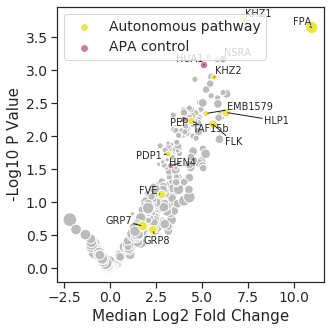

In [52]:
fig, ax = plt.subplots(figsize=(5, 5))

volcano_plot(
    fpa_ip.query('FPA == 3'),
    [autonomous_factors, apa_control_factors],
    ['Autonomous pathway', 'APA control'],
    ax,
    3
)

plt.tight_layout()
plt.savefig('figures/proteomics_flowering_factors.svg')
plt.show()

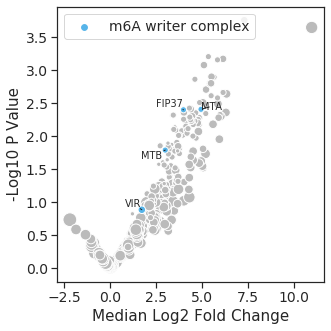

In [53]:
fig, ax = plt.subplots(figsize=(5, 5))

volcano_plot(
    fpa_ip.query('FPA == 3'),
    [m6a_factors],
    ['m6A writer complex'],
    ax, 
    5
)

plt.tight_layout()
plt.savefig('figures/proteomics_m6a_factors.svg')
plt.show()